In [1]:
import numpy as np
import Derivatives as Div
import Cheb as Ch
import matplotlib.pyplot as plt
from scipy.linalg import toeplitz

np.set_printoptions(linewidth=200)

class Parent:
    x = None

class Child1(Parent):
    def __init__(self) -> None:
        self.x = [1, 2]

parent = Parent()
child = Child1()

print(parent.x)
print(child.x)
print(Parent.x)
print(Child1.x)

None
[1, 2]
None
None


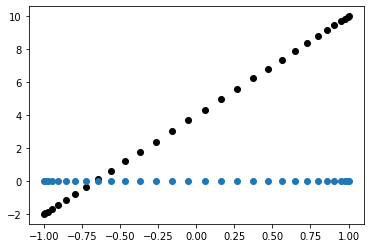

In [8]:
def poly3(x, a, b, c, d):
    return a*x*x*x + b*x*x + c*x + d

def poly3div(x, a, b, c):
    return 3*a*x*x + 2*b*x + c

def poly3bis(x, a, b, c):
    return 6*a*x * 2*b

N = 30          
x = Ch.Grid(N, mode='cheb').grid
D = Div.DR2(N).matrix

a, b, c, d = 1, 2, 3, 4

ydata = [poly3(i, a, b, c, d) for i in x]   # 3rd degree polynomial values
yRef = [poly3bis(i, a, b, c) for i in x] # true derivative
yD = D @ ydata                              # spectral derivative


# plt.plot(x, yRef, 'r')
plt.scatter(x, yD, c='black')
plt.scatter(x, [0 for i in range(N)])
plt.show()

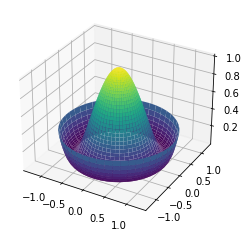

In [3]:
r = np.linspace(0, 1, 20)
t = np.linspace(0, 0.5, 20)


fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Create the mesh in polar coordinates and compute corresponding Z.
r = np.linspace(0, 1.25, 50)
p = np.linspace(0, 2*np.pi, 50)
R, P = np.meshgrid(r, p)
Z = ((R**2 - 1)**2)

# Express the mesh in the cartesian system.
X, Y = R*np.cos(P), R*np.sin(P)

# Plot the surface.
ax.plot_surface(X, Y, Z, cmap="viridis")
plt.show()


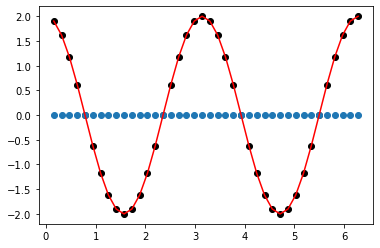

In [4]:
def sin(x, a, b, c, d):
    return a * np.sin(b*x + c)

def sinDiv(x, a, b, c, d):
    return a*b * np.cos(b*x + c)

N = 40
x = Ch.Grid(N, mode='uni').grid
D = Div.DTheta(N).matrix

a, b, c, d = 1, 2, 0, 4

ydata = [sin(i, a, b, c, d) for i in x]   # 3rd degree polynomial values
yRef = [sinDiv(i, a, b, c, d) for i in x] # true derivative
yD = D.dot(ydata)                            # spectral derivative

#print(yD - yRef)

plt.plot(x, yRef, 'r')
plt.scatter(x, yD, c='black')
plt.scatter(x, [0 for i in range(N)])
plt.show()

In [45]:
# use trick with mirroring radial grid - requires modification to differentiation matrix
# N = 6
NR, NTheta = 18, 18
dimR, dimTheta = NR-2, NTheta-2
r = Ch.Grid(NR, mode="cheb").grid[NR//2:-1]
t = Ch.Grid(NTheta, mode="uni").grid[1:-1]
D = Div.DR2(NR).matrix[1:-1, 1:-1]
E = Div.DR(NR).matrix[1:-1, 1:-1]
T = Div.DTheta2(NTheta).matrix[1:-1, 1:-1]
R = np.diag(1/r)

d1, d2 = D[:dimR//2, :dimR//2], D[:dimR//2, dimR//2:]
e1, e2 = E[:dimR//2, :dimR//2], E[:dimR//2, dimR//2:]

diagId = np.identity(dimTheta)
antiDiagId = np.kron(np.array([[0, 1], [1, 0]]), np.identity(dimTheta//2))

print(antiDiagId)

operator = np.kron(d1 + (R @ e1), diagId) + np.kron(d2 + (R @ e2), antiDiagId) + np.kron(R @ R, T)

#shape check
print(operator.shape)
print(np.kron(r, t).shape)

source = np.kron(-1*r*r, np.sin(t/2)**4) + np.kron(np.ones(len(r)), np.sin(6*t) * np.cos(t/2)**2)
# source = np.kron(np.ones(len(r)), np.ones(NTheta))
sol = np.linalg.solve(operator, source)

print("Operator Rank: ", np.linalg.matrix_rank(source))
print("Operator determinant: ", np.linalg.det(operator))
print("Operator: ", operator)
print("Source: ", source)
print("Solution: ", sol)


[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
(128, 128)
(128,)
Operator Rank:  1
Operator determinant:  inf
Operator:  [[-6.22515791e+03  1.41913308e+03  2.65091016e+01 ...  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.4

c:\Users\komok\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\linalg\linalg.py:2146: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Lattice size:  60
Size after boundary conditions:  3364


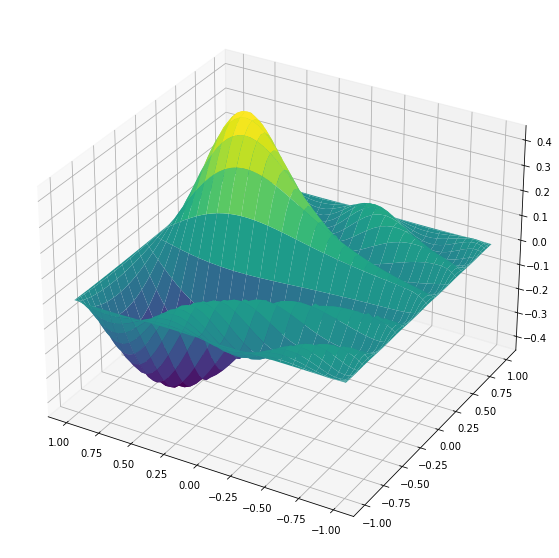

In [22]:
# 2D Poisson and Helmholtz solutions

N = 60
dim = N-2
k = 9
x, y = Ch.Grid(N).grid[1:-1], Ch.Grid(N).grid[1:-1]
D = Div.DR2(N).matrix[1:-1, 1:-1]

# Helmholtz
# L = np.kron(np.identity(dim), D) + np.kron(D, np.identity(dim)) + k*k * np.identity(dim**2)
# source = np.exp(np.kron(np.ones(dim), -10*(y-1)**2) + np.kron(-10*(x-0.5)**2, np.ones(dim)))

# Poisson equation
L = np.kron(np.identity(dim), D) + np.kron(D, np.identity(dim))
source = 10*np.sin(np.kron(8*x, y-1))

sol = np.linalg.solve(L, source).reshape((dim, dim))
print("Lattice size: ", N)
print("Size after boundary conditions: ", dim*dim)
# print("L rank: ", np.linalg.matrix_rank(L))


fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Create the mesh
X, Y = np.meshgrid(x, y)

# Plot the surface.
ax.plot_surface(X, Y, sol, cmap="viridis")
fig.set_size_inches(10, 10)
ax.invert_xaxis()
plt.show()
